In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
%matplotlib inline

import cv2

Using TensorFlow backend.


In [2]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

28 28


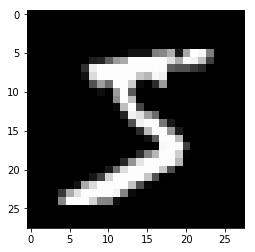

In [3]:
x = x_train[0].copy()

h, w = x.shape
print(h,w)

plt.imshow(x, 'gray')
plt.show()

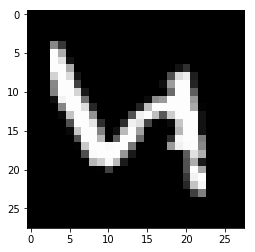

In [4]:
# 90度回転
rotate_90 = cv2.rotate(x, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(rotate_90, 'gray')
plt.show()

[[ 0.98480775  0.17364818 -2.21838303]
 [-0.17364818  0.98480775  2.64376595]]


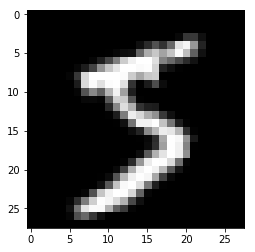

In [5]:
# 任意の角度
# アフィン変換

# 変換行列
mat = cv2.getRotationMatrix2D((w / 2, h / 2), 10, 1.0)
print(mat)

affine_x = cv2.warpAffine(x, mat, (w, h))

plt.imshow(affine_x, 'gray')
plt.show()

In [6]:
# 関数化

def rotate_x(x, angle, scale=1.0):
    x = x.reshape(28,28)
    h, w = x.shape
    
    mat = cv2.getRotationMatrix2D((w/2, h/2), angle, scale)
    affine_x = cv2.warpAffine(x, mat, (w, h))

    return affine_x

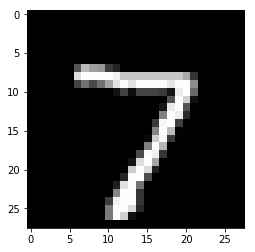

In [7]:
x2 = x_test[0].copy()
plt.imshow(x2, 'gray')
plt.show()

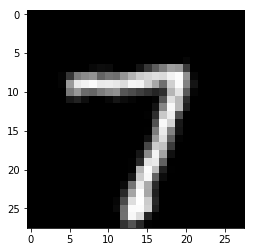

In [8]:
rotate_10 = rotate_x(x2, 10)
plt.imshow(rotate_10, 'gray')
plt.show()

In [9]:
# 水平移動

def shift_x(x, shift):
    x = x.reshape(28,28)
    h, w = x.shape
    
    src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
    dest = src.copy()
    dest[:,0] += shift
    affine = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(x, affine, (w, h))

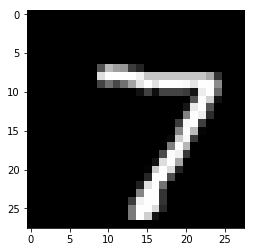

In [10]:
shift_x_10 = shift_x(x2, 3)
plt.imshow(shift_x_10, 'gray')
plt.show()

In [11]:
# 垂直移動

def shift_y(x, shift):
    x = x.reshape(28,28)
    h, w = x.shape
    
    src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
    dest = src.copy()
    dest[:,1] += shift
    affine = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(x, affine, (w, h))

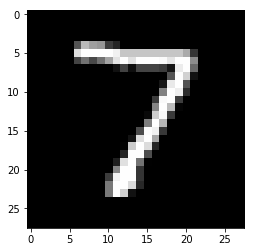

In [12]:
shift_y_10 = shift_y(x2, -3)
plt.imshow(shift_y_10, 'gray')
plt.show()